In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the COLVAR data
colvar_file = '/home/ndv3235/comp-lab-class-2024/Week6-Metadynamics/Inputs/2D/COLVAR2'  # replace with the path to your COLVAR file
data = np.loadtxt(colvar_file, skiprows=1)  # Skip header if necessary


# Assuming the COLVAR file has time in the first column, phi in the second, and psi in the third column
time = data[:, 0]  # First column (in ps)
phi = data[:, 1]   # Second column (phi angle in radians)
psi = data[:, 2]   # Third column (psi angle in radians)

# Convert time to nanoseconds
time_ns = time / 1000  # Convert ps to ns

# Select data for the first 2 ns
mask = time_ns <= 2
time_ns_filtered = time_ns[mask]
phi_filtered = phi[mask]
psi_filtered = psi[mask]

# Plotting
plt.figure(figsize=(12, 8))

# Plot phi
plt.subplot(2, 1, 1)
plt.plot(time_ns_filtered, phi_filtered, label='Phi', color='blue')
plt.xlabel('Time (ns)')
plt.ylabel('Phi (radians)')
plt.title('Time Evolution of Phi Angle')
plt.grid(True)
plt.legend()

# Plot psi
plt.subplot(2, 1, 2)
plt.plot(time_ns_filtered, psi_filtered, label='Psi', color='green')
plt.xlabel('Time (ns)')
plt.ylabel('Psi (radians)')
plt.title('Time Evolution of Psi Angle')
plt.grid(True)
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig('CV_evolution_phi_psi.png')  # Save the figure
plt.show()  # Show the figure

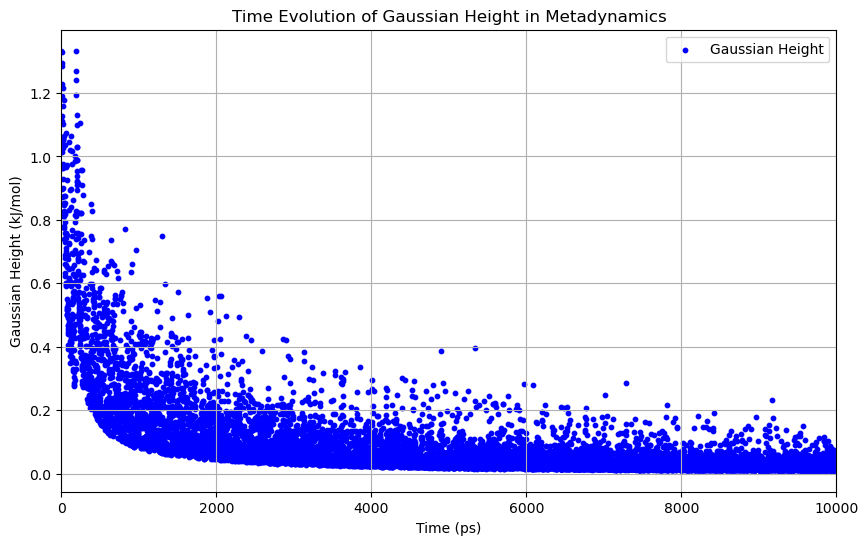

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the HILLS file
hills_file = '/home/ndv3235/comp-lab-class-2024/Week6-Metadynamics/Inputs/2D/HILLS'  # Replace with your HILLS file path
data = np.loadtxt(hills_file, comments='#')

# Extract columns
time = data[:, 0]  # First column: time
height = data[:, 5]  # Fourth column: Gaussian height

# Plotting the Gaussian height over time using dots
plt.figure(figsize=(10, 6))
plt.scatter(time, height, label='Gaussian Height', color='blue', s=10)  # s=10 controls the size of the dots
plt.xlabel('Time (ps)')
plt.ylabel('Gaussian Height (kJ/mol)')
plt.title('Time Evolution of Gaussian Height in Metadynamics')
plt.grid()
plt.legend()
plt.xlim(0, 10000)  # Adjust limits as needed for the first 2 ns
plt.show()

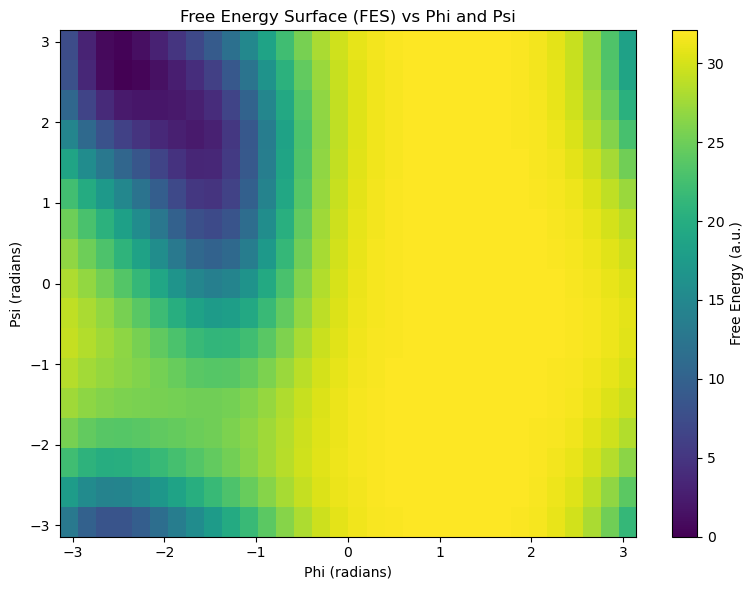

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the COLVAR data (replace with the path to your COLVAR file)
fes_file = '/home/ndv3235/comp-lab-class-2024/Week6-Metadynamics/Inputs/2D/fes_0.dat'  # Example path
data = np.loadtxt(fes_file, comments='#')  # Skips comment lines

# Extract phi, psi, and free energy (file.free)
phi = data[:, 0]    # First column (phi)
psi = data[:, 1]    # Second column (psi)
free_energy = data[:, 2]  # Third column (free energy)

# Reshape phi, psi, and free_energy into 2D grids for plotting
nbins_phi = 33  # As specified in your file
nbins_psi = 18  # As specified in your file

# Create the grid for phi and psi
phi_edges = np.linspace(-np.pi, np.pi, nbins_phi)
psi_edges = np.linspace(-np.pi, np.pi, nbins_psi)

# Create a 2D histogram for free energy
H, xedges, yedges = np.histogram2d(phi, psi, bins=[phi_edges, psi_edges], weights=free_energy)

# Normalize the free energy by subtracting the minimum value (to shift it to zero)
H = H - np.nanmin(H)

# Plot the Free Energy Surface (FES)
plt.figure(figsize=(8, 6))
plt.imshow(H.T, origin='lower', extent=[-np.pi, np.pi, -np.pi, np.pi], aspect='auto', cmap='viridis')
plt.colorbar(label='Free Energy (a.u.)')
plt.xlabel('Phi (radians)')
plt.ylabel('Psi (radians)')
plt.title('Free Energy Surface (FES) vs Phi and Psi')
plt.grid(False)
plt.tight_layout()

# Save the plot
plt.savefig('FES_vs_Phi_Psi.png')

# Show the plot
plt.show()